# Lab 1

## Imports

In [2]:
import torch
from torch import Tensor

import matplotlib.pyplot as plt
from  matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

## Exercise 1 (5P)

Suppose you have five input points, $\textbf{x}_1=(0,0)^\top$, $\textbf{x}_2=(1,0)^\top$,
$\textbf{x}_3=(0,-1)^\top$, $\textbf{x}_4=(-1,0)^\top$ and $\textbf{x}_5=(0,1)^\top$, and
the corresponding classes are $y_1=y_2=y_3=0$ and $y_4=y_5=1$:

In [3]:
x = torch.tensor([
    [0, 0],
    [1, 0],
    [0, -1],
    [-1, 0],
    [0, 1]
])
y = torch.tensor([0, 0, 0, 1, 1])
labs = ['$x_1$', '$x_2$', '$x_3$', '$x_4$', '$x_5$']

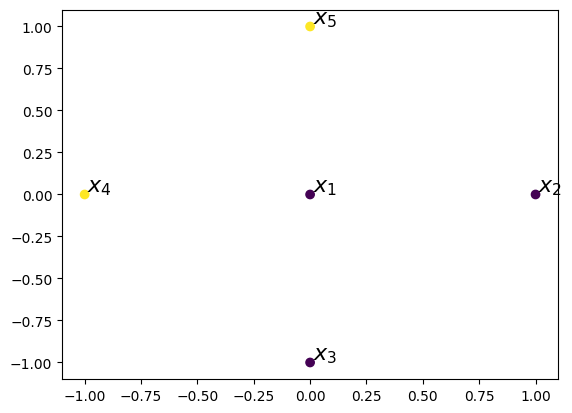

In [4]:
def plot_scatter(x: torch.tensor, y: torch.tensor, labs: torch.tensor) -> None: # type: ignore
    """Utility function to plot a scatter plot of the data"""
    # copy the input tensors to avoid modifying the original ones
    x = x.clone().detach().numpy()
    y = y.clone().detach().numpy()
    plt.scatter(x[:, 0], x[:, 1], c=y)
    for i, lab in enumerate(labs):
        plt.annotate(
            lab, (x[i, 0], x[i, 1]), size=16,
            xytext=(2, 2), textcoords='offset points'
        )
    plt.show()
    plt.close()

plot_scatter(x, y, labs)

Consider a logistic regression model
$\hat{y}_i=\sigma\left(\alpha_0+\alpha_1x_{i1}+\alpha_2x_{i2}\right)$, with
$\sigma(\cdot)$ the sigmoid function, $\sigma(x)=\left(1+e^{-x}\right)^{-1}$.
What values for $\alpha_0$, $\alpha_1$ and $\alpha_2$ would result in the correct
classification for this dataset? A positive label is predicted when the output of the
sigmoid is larger or equal than 0.5.

**Note**: do not use any formulas or automated methods to find the answer.
Think for yourself. A logistic regression classifier is nothing more than a hyper-plane
separating points of the two classes. If necessary, review vectors, dot-products and
their geometrical interpretation in linear algebra. This applies to the following
exercises, too.

We add a first column of ones, which is used for the 'bias'.

In [5]:
x_design = torch.cat([torch.ones(5, 1), x], dim=1)

In [6]:
a0 = (
-4/3
)

a1 = (
-16/3
)

a2 = (
4
)

a = torch.tensor([a0, a1, a2], dtype=torch.float)

# We define a custom sigmoid function
def sigmoid(x: Tensor) -> Tensor: # type: ignore
    return 1  / (1 + torch.exp(-x))
# Calculate predictions
scores = sigmoid(x_design @ a)

# Let's investigate the obtained scores.
def print_scores(target: Tensor, scores: Tensor) -> None:
    print('\tTarget\tScore')
    [print('{}\t{}\t{:.3f}'.format('x' + str(i), int(t), float(s)))
     for i, (t, s) in enumerate(zip(target, scores), start=1)]

print_scores(y, scores)

	Target	Score
x1	0	0.209
x2	0	0.001
x3	0	0.005
x4	1	0.982
x5	1	0.935


You should make sure that the last two values are close to one and the others
are close to zero.

**Note:** There are many valid parametrization that lead to a separating hyperplane. How would you prioritize between them?

**My Answer:** *Although many parameter choices define the same separating hyperplane, I would prioritize the one that yields larger margins between the classes — i.e., where positive samples have sigmoid outputs close to 1 and negative samples close to 0, resulting in a clearer and more confident separation.*


## Exercise 2 (5P)

Continuing from the previous exercise, suppose now that $y_2=y_3=1$ and $y_1=y_2=y_5=0$.

In [7]:
y = torch.tensor([0, 1, 1, 0, 0])

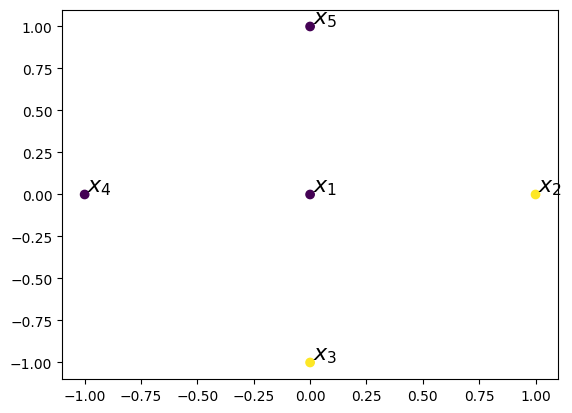

In [8]:
plot_scatter(x, y, labs)

Consider the same logistic regression model above with coefficients $\beta_0$, $\beta_1$
and $\beta_2$, how would you need to set these coefficients to correctly classify this
dataset?

In [47]:
b0 = (
-1
)

b1 = (
2
)

b2 = (
-2
)

b = torch.tensor([b0, b1, b2], dtype=torch.float)

print_scores(y, sigmoid(x_design @ b))

	Target	Score
x1	0	0.269
x2	1	0.731
x3	1	0.731
x4	0	0.047
x5	0	0.047


Make sure that the second and third elements are close to one, and the others close to zero.

